In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
grid = np.zeros((10, 10), dtype=int)
grid

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [3]:
grid[4,1] = 1
grid[6,6] = 2
grid

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [52]:
start = (2,2)
end = (6,7)

dir: (4, 5)
curr: [2, 2]
untill: (2.5, 2.5)
to_reach: (0.125, 0.1)
first_direction_to_reach 1
distance_in_direction: 0.1
new_pos: (2.4, 2.5)
[3, 3]
[2.4, 2.5]
---
dir: (4, 5)
curr: [2.4, 2.5]
untill: (2.5, 3.5)
to_reach: (0.025000000000000022, 0.2)
first_direction_to_reach 0
distance_in_direction: 0.025000000000000022
new_pos: (2.5, 2.625)
[4, 4]
[2.5, 2.625]
---
dir: (4, 5)
curr: [2.5, 2.625]
untill: (3.5, 3.5)
to_reach: (0.25, 0.175)
first_direction_to_reach 1
distance_in_direction: 0.175
new_pos: (3.2, 3.5)
[5, 5]
[3.2, 3.5]
---
dir: (4, 5)
curr: [3.2, 3.5]
untill: (3.5, 4.5)
to_reach: (0.07499999999999996, 0.2)
first_direction_to_reach 0
distance_in_direction: 0.07499999999999996
new_pos: (3.5, 3.875)
[6, 6]
[3.5, 3.875]
---


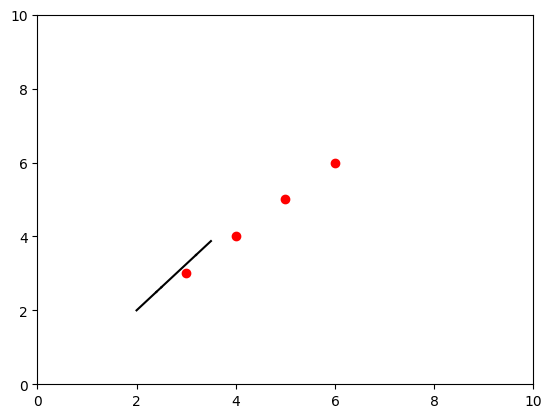

In [55]:
curr = list(start)
curr_block = list((round(start[0]), round(start[1])))
direction = (end[0] - start[0], end[1] - start[1])
done = end[0] == start[0] and end[1] == start[1]
step = 0
for i in range(4):
# while not done:
    print(f"dir: {direction}")
    print(f'curr: {curr}')
    if direction[0] > 0:
        untill_x = math.ceil(curr[0] - 0.49) + 0.5 * np.sign(direction[0])
    else:
        untill_x = math.floor(curr[0] + 0.49) + 0.5 * np.sign(direction[0])
    if direction[1] > 0:
        untill_y = math.ceil(curr[1] - 0.49) + 0.5 * np.sign(direction[1])
    else:
        untill_y = math.floor(curr[1] + 0.49) + 0.5 * np.sign(direction[1])
    print(f"untill: ({untill_x}, {untill_y})")
    to_reach_x = 0 if direction[0] == 0 else (untill_x - curr[0])/direction[0]
    to_reach_y = 0 if direction[1] == 0 else (untill_y - curr[1])/direction[1]
    to_reach = (to_reach_x, to_reach_y)
    print(f"to_reach: ({to_reach[0]}, {to_reach[1]})")
    first_direction_to_reach = np.argmin(to_reach)
    print(f"first_direction_to_reach {first_direction_to_reach}")
    if to_reach[first_direction_to_reach] == 0:
        first_direction_to_reach = 1 - first_direction_to_reach
    distance_in_direction = to_reach[first_direction_to_reach]
    print(f"distance_in_direction: {distance_in_direction}")
    new_pos = (curr[0] + direction[0]*distance_in_direction, curr[1] + direction[1]*distance_in_direction)
    print(f"new_pos: {new_pos}")
    # if reaching corner
    if all(to_reach):
        curr_block[0] += np.sign(direction[0])
        curr_block[1] += np.sign(direction[1])
    else:
        curr_block[first_direction_to_reach] += np.sign(direction[first_direction_to_reach])
    print(curr_block)
    # plot line from curr to new_pos
    plt.plot([curr[0], new_pos[0]], [curr[1], new_pos[1]], 'k-')
    curr = list(new_pos)
    print(curr)
    print("---")
    step += 1
    # plot block
    plt.plot(curr_block[0], curr_block[1], 'ro')
    if curr_block[0] == end[0] and curr_block[1] == end[1]:
        done = True

# plot grid
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [39]:
start = (4.1,4)
end = (2,2)

KeyboardInterrupt: 

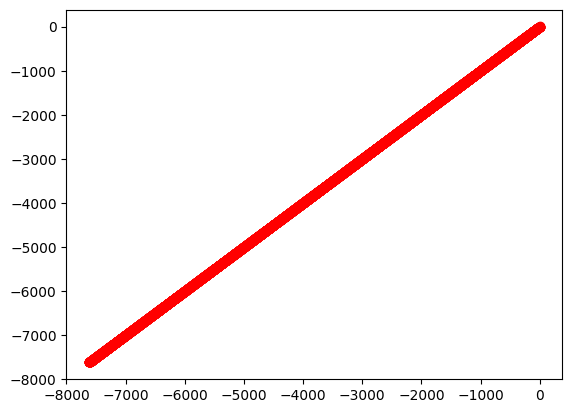

In [40]:
curr = list(start)
curr_block = list(start)
direction = (end[0] - start[0], end[1] - start[1])
done = end[0] == start[0] and end[1] == start[1]
while not done:
    if direction[0] > 0:
        untill_x = math.ceil(curr[0] - 0.49) + 0.5 * np.sign(direction[0])
    else:
        untill_x = math.floor(curr[0] + 0.49) + 0.5 * np.sign(direction[0])
    if direction[1] > 0:
        untill_y = math.ceil(curr[1] - 0.49) + 0.5 * np.sign(direction[1])
    else:
        untill_y = math.floor(curr[1] + 0.49) + 0.5 * np.sign(direction[1])
    to_reach_x = 0 if direction[0] == 0 else (untill_x - curr[0])/direction[0]
    to_reach_y = 0 if direction[1] == 0 else (untill_y - curr[1])/direction[1]
    to_reach = (to_reach_x, to_reach_y)
    first_direction_to_reach = np.argmin(to_reach)
    if to_reach[first_direction_to_reach] == 0:
        first_direction_to_reach = 1 - first_direction_to_reach
    distance_in_direction = to_reach[first_direction_to_reach]
    new_pos = (curr[0] + direction[0]*distance_in_direction, curr[1] + direction[1]*distance_in_direction)
    # if reaching corner
    if all(to_reach):
        curr_block[0] += np.sign(direction[0])
        curr_block[1] += np.sign(direction[1])
    else:
        curr_block[first_direction_to_reach] += np.sign(direction[first_direction_to_reach])
    curr = list(new_pos)
    
    if curr_block[0] == end[0] and curr_block[1] == end[1]:
        done = True
    # plot block
    plt.plot(curr_block[0], curr_block[1], 'ro')

# plot grid
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

In [6]:

# while curr != end: